# Module 4 — Team Millie


## COVID Data


In [1]:
import numpy as np, pandas as pd
from datetime import datetime, timedelta

# COVID NUMBERS
N = 331002651/1e6  # US population in millions
df_full = pd.read_csv("/Users/smgroves/Library/CloudStorage/GoogleDrive-sarahmaddoxgroves@gmail.com/My Drive/Teaching/BME_2315_F2025/Module_4/Data/raw/US_COVID19_I_estimates.csv")
df_full['I_est'] = df_full['I_est'] / 1e6  # convert to millions
df_full = df_full[(df_full['date'] <= '2021-03-17')&(df_full['date'] >= '2020-09-17')]
df_full.head()

,date,I_est
239,2020-09-17,0.531131
240,2020-09-18,0.532699
241,2020-09-19,0.535116
242,2020-09-20,0.547643
243,2020-09-21,0.555201


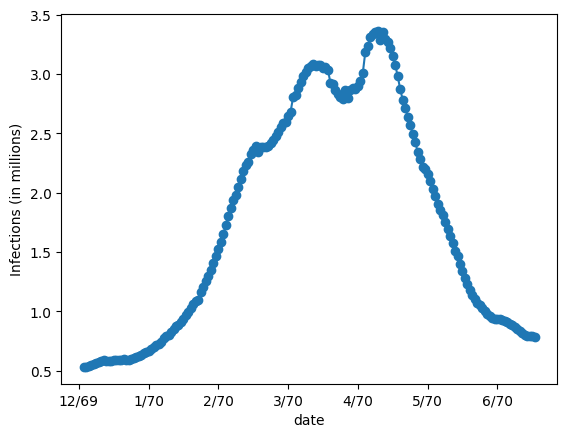

In [2]:
# Quick exploration plot of partial data
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

plt.plot(df_full['date'], df_full['I_est'], 'o-')
plt.xlabel('date'); plt.ylabel('Infections (in millions)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%-m/%-y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
plt.show()

## Euler's method


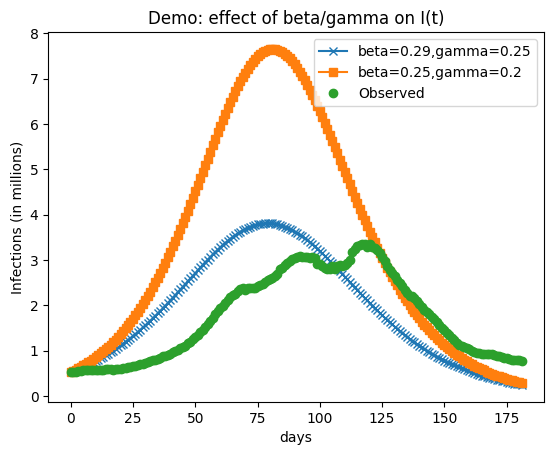

0.8153007041060082
6.414368922418175


In [ ]:
# Euler integrator function (already defined above but re-defining for clarity)
from main_functions_instructor import euler_sir

I_obs = df_full['I_est'].values.astype(float)   # Set up I_obs array from data directly
t_obs = np.linspace(0, len(I_obs)-1, len(I_obs)) # time array in days

I0_obs = df_full.iloc[0]['I_est']
R0_obs = 0.0
S0_obs = N - I0_obs - R0_obs

beta1 = .29 #random guess for beta
gamma1 = 1/4 #random guess for gamma
beta2 = 0.25 #alternative guesses
gamma2 = 1/5 #alternative guesses
S1,I1,R1 = euler_sir(beta1, gamma1,S0_obs, I0_obs, R0_obs, t_obs, N)
S2,I2,R2 = euler_sir(beta2, gamma2, S0_obs, I0_obs, R0_obs, t_obs, N)

plt.plot(t_obs, I1, label=f'beta={beta1},gamma={gamma1}', marker='x')
plt.plot(t_obs, I2, label=f'beta={beta2},gamma={gamma2}', marker='s')
plt.plot(t_obs, I_obs, 'o', label='Observed')

plt.legend()
plt.xlabel('days')
plt.ylabel('Infections (in millions)')
plt.title('Demo: effect of beta/gamma on I(t)')
plt.show()

print(np.mean((I1 - I_obs)**2))

print(np.mean((I2 - I_obs)**2))
